In [419]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt

In [420]:
#import stock data to dataframe
tickers_1 = ['TSLA', 'AMZN', 'SHOP', 'MU', 'F', 'AAPL', 'META', 'NVDA', 'AMD', 'GOOG']
tickers_2 = ['CVX', 'XOM', 'RY', 'TD', 'PFE', 'JNJ', 'NKE', 'MCD', 'WMT', 'COST']
tickers_3 = ['ENB', 'ATH.TO', 'NVA.TO', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'ATD.TO']
tickers_index = 'SPY'

start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 12, 31)
 
df_1 = pdr.get_data_yahoo(tickers_1, start, end)
df_2 = pdr.get_data_yahoo(tickers_2, start, end)
df_3 = pdr.get_data_yahoo(tickers_3, start, end)
df_index = pdr.get_data_yahoo(tickers_index, start, end)


In [421]:
df_1
#df_1.isnull().sum().sum()

Attributes    Adj Close                                                \
Symbols            TSLA        AMZN        SHOP         MU          F   
Date                                                                    
2017-01-03    43.397999   37.683498    4.282000  22.419943  10.085313   
2017-01-04    45.397999   37.859001    4.414000  22.231041  10.549926   
2017-01-05    45.349998   39.022499    4.768000  21.982483  10.229505   
2017-01-06    45.801998   39.799500    4.690000  21.912888  10.221493   
2017-01-09    46.256001   39.846001    4.718000  22.211153  10.117356   
...                 ...         ...         ...        ...        ...   
2021-12-27  1093.939941  169.669495  140.059006  94.016617  20.556833   
2021-12-28  1088.469971  170.660995  137.561996  92.533142  20.517302   
2021-12-29  1086.189941  169.201004  139.207993  95.749008  20.319641   
2021-12-30  1070.339966  168.644501  139.824005  93.478981  20.230692   
2021-12-31  1056.780029  166.716995  137.738998  92.841110  20.527185   

Attributes                                                               ...  \
Symbols           AAPL        META        NVDA         AMD         GOOG  ...   
Date                                                                     ...   
2017-01-03   27.257647  116.860001   25.161133   11.430000   786.140015  ...   
2017-01-04   27.227135  118.690002   25.748165   11.430000   786.900024  ...   
2017-01-05   27.365591  120.669998   25.094528   11.240000   794.020020  ...   
2017-01-06   27.670677  123.410004   25.429981   11.320000   806.150024  ...   
2017-01-09   27.924126  124.900002   26.460989   11.490000   806.650024  ...   
...                ...         ...         ...         ...          ...  ...   
2021-12-27  179.836319  346.179993  309.331909  154.360001  2961.280029  ...   
2021-12-28  178.799164  346.220001  303.104279  153.149994  2928.959961  ...   
2021-12-29  178.888916  342.940002  299.895508  148.259995  2930.090088  ...   
2021-12-30  177.712143  344.359985  295.747070  145.149994  2920.050049  ...   
2021-12-31  177.083878  336.350006  293.997742  143.899994  2893.590088  ...   

Attributes      Volume                                                   \
Symbols           TSLA         AMZN        SHOP          MU           F   
Date                                                                      
2017-01-03  29616500.0   70422000.0   7054000.0  24962900.0  40510800.0   
2017-01-04  56067500.0   50210000.0   8481000.0  20426800.0  77638100.0   
2017-01-05  29558500.0  116602000.0  50702000.0  19759400.0  75628400.0   
2017-01-06  27639500.0  119724000.0  20613000.0  17782200.0  40315900.0   
2017-01-09  19897500.0   68922000.0   9211000.0  21537200.0  39438400.0   
...                ...          ...         ...         ...         ...   
2021-12-27  23715300.0   58688000.0   7207000.0  17110100.0  59651800.0   
2021-12-28  20108000.0   54638000.0   5830000.0  13683800.0  53020500.0   
2021-12-29  18718000.0   35754000.0   6410000.0  32234600.0  37883000.0   
2021-12-30  15680300.0   37584000.0   5688000.0  19327800.0  51470100.0   
2021-12-31  13577900.0   47830000.0   4713000.0  13660600.0  51899600.0   

Attributes                                                               
Symbols            AAPL        META         NVDA         AMD       GOOG  
Date                                                                     
2017-01-03  115127600.0  20663900.0  150199600.0  55182000.0  1657300.0  
2017-01-04   84472400.0  19630900.0  119922000.0  40781200.0  1073000.0  
2017-01-05   88774400.0  19492200.0   98429600.0  38855200.0  1335200.0  
2017-01-06  127007600.0  28545300.0   82285600.0  34453500.0  1640200.0  
2017-01-09  134247600.0  22880400.0   91624800.0  37304800.0  1274600.0  
...                 ...         ...          ...         ...        ...  
2021-12-27   74919600.0  17795000.0   40368600.0  53296400.0   662800.0  
2021-12-28   79144300.0  16637600.0   42059100.0  58699100.0   93

In [422]:
# Function to clean df (drop columns, delete null values)
def clean_df(df):
    df = df.drop(['Open','High','Low','Volume','Adj Close'],axis=1) #drop unwanted columns
    df = df.dropna().copy() #drop null values
    print(f"Number of Null Values: {df.isnull().sum().sum()}") #check for null values and print
    return df #return df to variable

In [423]:
df_1 = clean_df(df_1)
df_1

Number of Null Values: 0


Attributes        Close                                                \
Symbols            TSLA        AMZN        SHOP         MU          F   
Date                                                                    
2017-01-03    43.397999   37.683498    4.282000  22.549999  12.590000   
2017-01-04    45.397999   37.859001    4.414000  22.360001  13.170000   
2017-01-05    45.349998   39.022499    4.768000  22.110001  12.770000   
2017-01-06    45.801998   39.799500    4.690000  22.040001  12.760000   
2017-01-09    46.256001   39.846001    4.718000  22.340000  12.630000   
...                 ...         ...         ...        ...        ...   
2021-12-27  1093.939941  169.669495  140.059006  94.430000  20.799999   
2021-12-28  1088.469971  170.660995  137.561996  92.940002  20.760000   
2021-12-29  1086.189941  169.201004  139.207993  96.169998  20.559999   
2021-12-30  1070.339966  168.644501  139.824005  93.889999  20.469999   
2021-12-31  1056.780029  166.716995  137.738998  93.150002  20.770000   

Attributes                                                               
Symbols           AAPL        META        NVDA         AMD         GOOG  
Date                                                                     
2017-01-03   29.037500  116.860001   25.502501   11.430000   786.140015  
2017-01-04   29.004999  118.690002   26.097500   11.430000   786.900024  
2017-01-05   29.152500  120.669998   25.434999   11.240000   794.020020  
2017-01-06   29.477501  123.410004   25.775000   11.320000   806.150024  
2017-01-09   29.747499  124.900002   26.820000   11.490000   806.650024  
...                ...         ...         ...         ...          ...  
2021-12-27  180.330002  346.179993  309.450012  154.360001  2961.280029  
2021-12-28  179.289993  346.220001  303.220001  153.149994  2928.959961  
2021-12-29  179.380005  342.940002  300.010010  148.259995  2930.090088  
2021-12-30  178.199997  344.359985  295.859985  145.149994  2920.050049  
2021-12-31  177.570007  336.350006  294.109985  143.899994  2893.590088  

[1259 rows x 10 columns]

In [424]:
df_2 = clean_df(df_2)

Number of Null Values: 0


In [425]:
df_2

Attributes       Close                                               \
Symbols            CVX        XOM          RY         TD        PFE   
Date                                                                  
2017-01-03  117.849998  90.889999   68.139999  49.790001  31.309298   
2017-01-04  117.820000  89.889999   69.769997  50.840000  31.584440   
2017-01-05  117.309998  88.550003   70.080002  51.220001  31.888046   
2017-01-06  116.839996  88.500000   70.070000  50.869999  31.764706   
2017-01-09  115.839996  87.040001   69.940002  50.660000  31.755219   
...                ...        ...         ...        ...        ...   
2021-12-27  118.790001  61.889999  105.589996  76.470001  59.200001   
2021-12-28  118.559998  61.689999  105.730003  76.500000  58.009998   
2021-12-29  117.949997  61.150002  105.290001  76.190002  57.580002   
2021-12-30  117.430000  60.790001  105.489998  76.300003  58.400002   
2021-12-31  117.349998  61.189999  106.139999  76.680000  59.049999   

Attributes                                                              
Symbols            JNJ         NKE         MCD         WMT        COST  
Date                                                                    
2017-01-03  115.839996   51.980000  119.620003   68.660004  159.729996  
2017-01-04  115.650002   53.070000  119.480003   69.059998  159.759995  
2017-01-05  116.860001   53.060001  119.699997   69.209999  162.910004  
2017-01-06  116.300003   53.910000  120.760002   68.260002  162.830002  
2017-01-09  116.279999   53.380001  120.430000   68.709999  160.970001  
...                ...         ...         ...         ...         ...  
2021-12-27  169.669998  167.580002  268.239990  140.759995  563.469971  
2021-12-28  170.350006  166.419998  267.880005  142.779999  564.640015  
2021-12-29  171.550003  168.779999  268.489990  142.710007  567.770020  
2021-12-30  172.309998  167.490005  267.209991  143.169998  563.909973  
2021-12-31  171.070007  166.669998  268.070007  144.690002  567.700012  

[1259 rows x 10 columns]

In [426]:
df_3 = clean_df(df_3)

Number of Null Values: 0


In [427]:
df_3

Attributes      Close                                                 \
Symbols           ENB ATH.TO NVA.TO        TVE        CNR         CP   
Date                                                                   
2017-01-03  42.540001   2.05   6.86  24.700001  16.049999  28.285999   
2017-01-04  42.840000   2.05   7.02  24.650000  16.100000  29.190001   
2017-01-05  43.340000   2.00   6.90  24.700001  15.650000  29.431999   
2017-01-06  43.610001   2.00   6.87  24.650000  15.900000  29.728001   
2017-01-09  43.450001   1.90   6.73  24.650000  15.500000  29.098000   
...               ...    ...    ...        ...        ...        ...   
2021-12-22  37.610001   1.18   6.81  25.629999  16.139999  71.769997   
2021-12-23  38.000000   1.19   6.90  25.469999  16.430000  71.250000   
2021-12-29  38.389999   1.19   7.21  25.780001  17.450001  72.029999   
2021-12-30  38.650002   1.20   6.98  25.580000  17.219999  71.589996   
2021-12-31  39.080002   1.19   6.96  25.920000  17.440001  71.940002   

Attributes                                               
Symbols           BNS         TRI        BCE     ATD.TO  
Date                                                     
2017-01-03  56.380001   43.860001  43.470001  31.250000  
2017-01-04  57.439999   44.349998  44.080002  31.525000  
2017-01-05  57.790001   44.730000  44.500000  31.805000  
2017-01-06  57.880001   44.820000  44.259998  31.615000  
2017-01-09  57.689999   44.560001  43.790001  31.799999  
...               ...         ...        ...        ...  
2021-12-22  69.099998  116.599998  51.279999  51.580002  
2021-12-23  69.790001  116.860001  51.299999  52.680000  
2021-12-29  71.370003  118.629997  51.520000  53.000000  
2021-12-30  71.730003  118.629997  51.700001  53.480000  
2021-12-31  71.690002  119.620003  52.040001  53.000000  

[1233 rows x 10 columns]

In [428]:
df_index = clean_df(df_index)
df_index.columns = ['SPY']

Number of Null Values: 0


In [429]:
df_index

,SPY
Date,
2017-01-03,225.240005
2017-01-04,226.580002
2017-01-05,226.399994
2017-01-06,227.210007
2017-01-09,226.460007
...,...
2021-12-27,477.260010
2021-12-28,476.869995
2021-12-29,477.480011


In [430]:
#function to calculate daily returns of portfolio
def daily_returns(df):
    daily_returns = df.pct_change()
    daily_returns = daily_returns.dropna().copy()
    print(f"Number of Null Values: {daily_returns.isnull().sum().sum()}") #check for null values and print
    return daily_returns


In [431]:
# Calculate daily returns of the Portfoli0
daily_returns_1 = daily_returns(df_1)
daily_returns_1.head()

Number of Null Values: 0


Attributes     Close                                                    \
Symbols         TSLA      AMZN      SHOP        MU         F      AAPL   
Date                                                                     
2017-01-04  0.046085  0.004657  0.030827 -0.008426  0.046068 -0.001119   
2017-01-05 -0.001057  0.030732  0.080199 -0.011181 -0.030372  0.005085   
2017-01-06  0.009967  0.019912 -0.016359 -0.003166 -0.000783  0.011148   
2017-01-09  0.009912  0.001168  0.005970  0.013612 -0.010188  0.009159   
2017-01-10 -0.006097 -0.001280  0.014625  0.006267  0.017419  0.001009   

Attributes                                          
Symbols         META      NVDA       AMD      GOOG  
Date                                                
2017-01-04  0.015660  0.023331  0.000000  0.000967  
2017-01-05  0.016682 -0.025386 -0.016623  0.009048  
2017-01-06  0.022707  0.013367  0.007117  0.015277  
2017-01-09  0.012074  0.040543  0.015018  0.000620  
2017-01-10 -0.004404 -0.007550 -0.004352 -0.002306

In [432]:
# Count nulls
daily_returns_2 = daily_returns(df_2)
daily_returns_2.head()

Number of Null Values: 0


Attributes     Close                                                    \
Symbols          CVX       XOM        RY        TD       PFE       JNJ   
Date                                                                     
2017-01-04 -0.000255 -0.011002  0.023921  0.021089  0.008788 -0.001640   
2017-01-05 -0.004329 -0.014907  0.004443  0.007474  0.009613  0.010463   
2017-01-06 -0.004006 -0.000565 -0.000143 -0.006833 -0.003868 -0.004792   
2017-01-09 -0.008559 -0.016497 -0.001855 -0.004128 -0.000299 -0.000172   
2017-01-10 -0.007597 -0.012753  0.005290  0.001579 -0.000896 -0.001032   

Attributes                                          
Symbols          NKE       MCD       WMT      COST  
Date                                                
2017-01-04  0.020970 -0.001170  0.005826  0.000188  
2017-01-05 -0.000188  0.001841  0.002172  0.019717  
2017-01-06  0.016020  0.008856 -0.013726 -0.000491  
2017-01-09 -0.009831 -0.002733  0.006592 -0.011423  
2017-01-10 -0.005058 -0.001495 -0.006986  0.004287

In [433]:
daily_returns_3 = daily_returns(df_3)
daily_returns_3.head()

Number of Null Values: 0


Attributes     Close                                                    \
Symbols          ENB    ATH.TO    NVA.TO       TVE       CNR        CP   
Date                                                                     
2017-01-04  0.007052  0.000000  0.023324 -0.002024  0.003115  0.031959   
2017-01-05  0.011671 -0.024390 -0.017094  0.002028 -0.027950  0.008290   
2017-01-06  0.006230  0.000000 -0.004348 -0.002024  0.015974  0.010057   
2017-01-09 -0.003669 -0.050000 -0.020378  0.000000 -0.025157 -0.021192   
2017-01-10 -0.014499 -0.005263 -0.017831  0.002434  0.029032  0.005499   

Attributes                                          
Symbols          BNS       TRI       BCE    ATD.TO  
Date                                                
2017-01-04  0.018801  0.011172  0.014033  0.008800  
2017-01-05  0.006093  0.008568  0.009528  0.008882  
2017-01-06  0.001557  0.002012 -0.005393 -0.005974  
2017-01-09 -0.003283 -0.005801 -0.010619  0.005852  
2017-01-10  0.008494  0.001122  0.000913 -0.009434

In [434]:
daily_returns_index = daily_returns(df_index)
daily_returns_index

Number of Null Values: 0


,SPY
Date,
2017-01-04,0.005949
2017-01-05,-0.000794
2017-01-06,0.003578
2017-01-09,-0.003301
2017-01-10,0.000000
...,...
2021-12-27,0.014152
2021-12-28,-0.000817
2021-12-29,0.001279


In [435]:
# Calculate weighted returns for your portfolio, assuming equal number of shares per stock.
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

def dot_product(daily):
    daily = daily.dot(weights)
    return daily

In [436]:
daily_returns_1 = dot_product(daily_returns_1)
daily_returns_2 = dot_product(daily_returns_2)
daily_returns_3 = dot_product(daily_returns_3)

In [437]:
daily_returns_1

Date
2017-01-04    0.015805
2017-01-05    0.005713
2017-01-06    0.007919
2017-01-09    0.009789
2017-01-10    0.001333
                ...   
2021-12-27    0.017957
2021-12-28   -0.007922
2021-12-29   -0.002467
2021-12-30   -0.008222
2021-12-31   -0.008262
Length: 1258, dtype: float64

In [438]:
daily_returns_2

Date
2017-01-04    0.006671
2017-01-05    0.003630
2017-01-06   -0.000955
2017-01-09   -0.004890
2017-01-10   -0.002466
                ...   
2021-12-27    0.013445
2021-12-28   -0.001138
2021-12-29   -0.000097
2021-12-30   -0.000427
2021-12-31    0.003664
Length: 1258, dtype: float64

In [439]:
daily_returns_3

Date
2017-01-04    0.011623
2017-01-05   -0.001437
2017-01-06    0.001809
2017-01-09   -0.013425
2017-01-10    0.000047
                ...   
2021-12-22    0.010712
2021-12-23    0.007047
2021-12-29    0.018854
2021-12-30   -0.002618
2021-12-31    0.003627
Length: 1232, dtype: float64

In [457]:
combined_df = pd.concat([daily_returns_1, daily_returns_2, daily_returns_3, daily_returns_index], axis="columns", join="inner")

In [458]:
combined_df

,0,1,2,SPY
Date,,,,
2017-01-04,0.015805,0.006671,0.011623,0.005949
2017-01-05,0.005713,0.003630,-0.001437,-0.000794
2017-01-06,0.007919,-0.000955,0.001809,0.003578
2017-01-09,0.009789,-0.004890,-0.013425,-0.003301
2017-01-10,0.001333,-0.002466,0.000047,0.000000
...,...,...,...,...
2021-12-22,0.014482,0.005993,0.010712,0.009999
2021-12-23,0.019051,0.001533,0.007047,0.006222
2021-12-29,-0.002467,-0.000097,0.018854,0.001279


In [464]:
combined_df.columns = ['Portfolio 1','Portfolio 2','Portfolio 3','S&P Index']

In [465]:
combined_df

,Portfolio 1,Portfolio 2,Portfolio 3,S&P Index
Date,,,,
2017-01-04,0.015805,0.006671,0.011623,0.005949
2017-01-05,0.005713,0.003630,-0.001437,-0.000794
2017-01-06,0.007919,-0.000955,0.001809,0.003578
2017-01-09,0.009789,-0.004890,-0.013425,-0.003301
2017-01-10,0.001333,-0.002466,0.000047,0.000000
...,...,...,...,...
2021-12-22,0.014482,0.005993,0.010712,0.009999
2021-12-23,0.019051,0.001533,0.007047,0.006222
2021-12-29,-0.002467,-0.000097,0.018854,0.001279


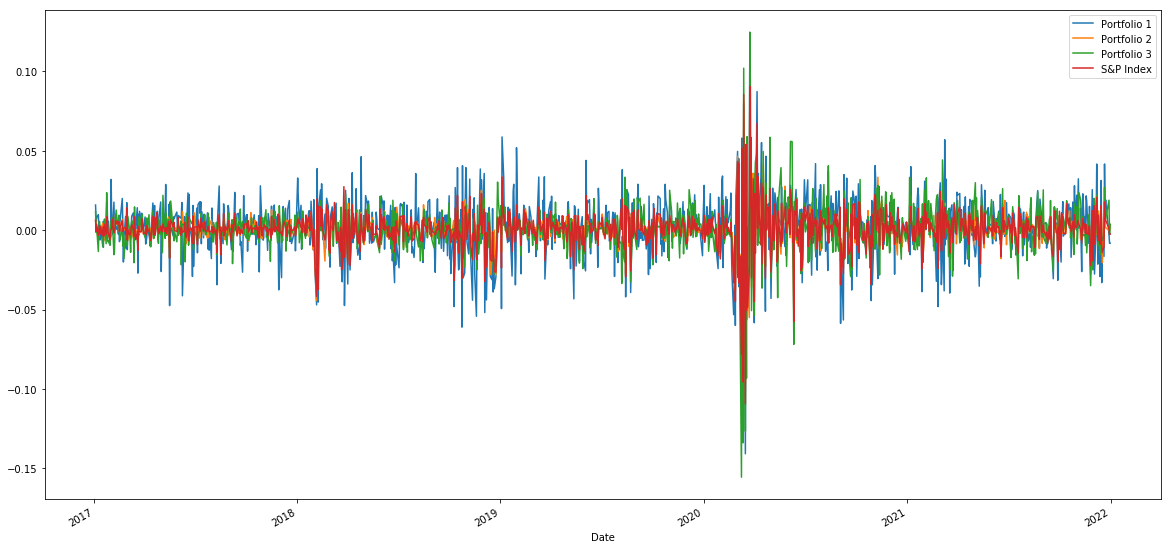

In [466]:
# Quantitative Analysis

# Performance analysis

# Plot daily returns of all portfolios

combined_df.plot(figsize=(20,10))

In [467]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,Portfolio 1,Portfolio 2,Portfolio 3,S&P Index
Date,,,,
2017-01-04,1.015805,1.006671,1.011623,1.005949
2017-01-05,1.021608,1.010325,1.010169,1.005150
2017-01-06,1.029698,1.009361,1.011997,1.008746
2017-01-09,1.039778,1.004424,0.998411,1.005416
2017-01-10,1.041164,1.001948,0.998458,1.005416


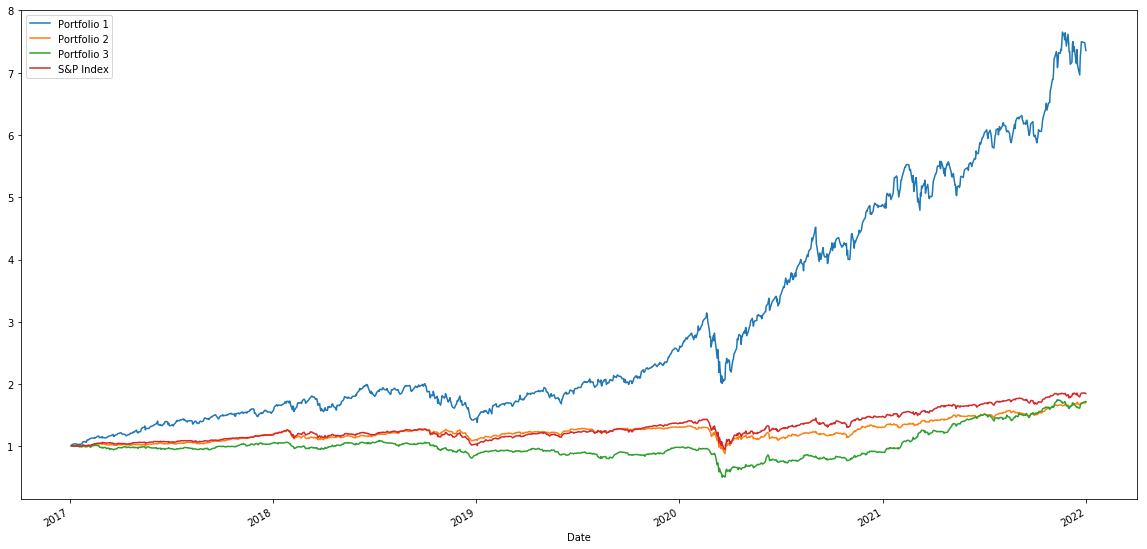

In [468]:
cumulative_returns.plot(figsize=(20,10))

Risk Analysis